# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
studen_data = pd.read_csv("students-data.csv", sep = ';')
#https://archive.ics.uci.edu/ml/datasets/Student+Performance
studen_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [27]:
studen_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [28]:
studen_data.index.name='number'
studen_data.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [29]:
#to see the if na is present in the dataframe
studen_data.isna().sum().sum()

0

In [30]:
studen_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [31]:
print(studen_data.select_dtypes(include='object',exclude='int64').columns)
#for col in studen_data:
    #if studen_data[col].dtype == 'object':
        

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [108]:
new_student_data = studen_data.select_dtypes(include='number')
new_data_cat = studen_data.select_dtypes(exclude=['integer'])
#new_student_data.loc[:1].var
#new_student_data.var()
new_data_cat

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


In [109]:
#creating a new data frame before dropping the columns
#new_student_data = studen_data
new_list = []
for col in new_student_data.columns:
    if new_student_data[col].var()< 1:
       new_list.append(col)
new_student_data.drop(columns=new_list)    


,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10
5,16,4,3,2,2,5,10,15,15,15
6,16,2,2,4,1,3,0,12,12,11
7,17,4,4,4,1,1,6,6,5,6
8,15,3,2,2,1,1,0,16,18,19


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [110]:
#!pip install sklearn
import sklearn as sk
from  sklearn import preprocessing
#LabelEncoder
labelencoder = preprocessing.LabelEncoder()
for col in new_data_cat.columns:
    #print(col)
    new_data_cat[col] = labelencoder.fit_transform(new_data_cat[col])
new_data_cat.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [111]:


for col in ['G1','G2','G3']:
    print(col)
    new_student_data[col] = np.where(new_student_data[col] >= 10 , 1 ,0)
    
#new_data_cat
new_student_data.head()

G1
G2
G3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [127]:
new_student = pd.concat([new_student_data,new_data_cat],axis = 1)
#new_student
Y = new_student['G3']
X = new_student.drop(['G3'],axis = 1)
Y.head()

number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int32

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.24, random_state=100)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(300, 32) (95, 32) (95,) (300,)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [145]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = True)
mdl = model.fit(X_train,y_train )
print(model.coef_)
#mdl.accuracy(X_train,y_train)
print("\nthe score is")
mdl.score(X_train,y_train)

[[-0.2379111   0.13390446 -0.19782957 -0.08632706 -0.10407083 -0.21868276
   0.58360459 -0.01021576 -0.38037194 -0.29606131  0.79504947 -0.18183801
  -0.03153283  1.55769752  4.17466799  0.10308058 -0.36220442  0.08076455
  -0.16396569 -0.6490894  -0.0506532   0.37876502  0.1276423   0.38691438
  -0.42083118 -0.44443808 -0.02713257 -0.08098997 -0.5126098   0.80988917
  -0.04133625 -0.41632593]]

the score is


0.9366666666666666

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [146]:
mdl.intercept_

array([0.2392175])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [162]:

coef = pd.DataFrame(data=mdl.coef_, columns = X_train.columns).transpose()
coef

,0
age,-0.237911
Medu,0.133904
Fedu,-0.197830
traveltime,-0.086327
studytime,-0.104071
failures,-0.218683
famrel,0.583605
freetime,-0.010216
goout,-0.380372
Dalc,-0.296061


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [169]:
#for the testing data set
mdl = model.predict(X_test)
print(model.coef_)
#mdl.accuracy(X_train,y_train)
print("\nthe score is for test data")
model.score(X_test,y_test)

[[-0.2379111   0.13390446 -0.19782957 -0.08632706 -0.10407083 -0.21868276
   0.58360459 -0.01021576 -0.38037194 -0.29606131  0.79504947 -0.18183801
  -0.03153283  1.55769752  4.17466799  0.10308058 -0.36220442  0.08076455
  -0.16396569 -0.6490894  -0.0506532   0.37876502  0.1276423   0.38691438
  -0.42083118 -0.44443808 -0.02713257 -0.08098997 -0.5126098   0.80988917
  -0.04133625 -0.41632593]]

the score is for test data


0.8947368421052632

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [330]:
import numpy as np
import pandas as pd
bc = pd.read_csv("bc2.csv")
bc

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [331]:
print(bc.shape)
print("\nthe data types is")
bc.dtypes

(699, 11)

the data types is


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [334]:
bc.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


FOr ID


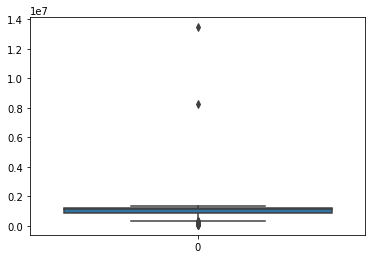

In [335]:
%matplotlib inline
import seaborn as sns
# sns.boxplot(data=bc)
print("FOr ID")
sns.boxplot(data=bc['ID'])
#there are outliers in ID column

### Check Missing Values

In [336]:
bc.isnull().sum().sum()

0

In [337]:
bc.isna().sum().sum()

0

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [338]:
top = bc.describe(include ='all')['Bare Nuclei'].top
print(top)

bc['Bare Nuclei'] = np.where(bc['Bare Nuclei'] == '?' , top ,bc['Bare Nuclei'])
# bc['Bare Nuclei']

1


#### Print and plot the distribution of target variable (Class - using Histogram) 

In [339]:
# # #outlier treatment
# bc['Bare Nuclei'] = bc['Bare Nuclei'].astype('int64') 
# #bc.dtypes
# bc_new = bc.drop(columns='Class')
# q1 = bc_new.quantile(0.25)
# q3 = bc_new.quantile(0.75)
# IQR = q3 - q1
# minCap = q1 - (1.5 * IQR)
# maxCap = q3 + (1.5 * IQR)
# # # print(minCap,maxCap)
# bc_new = bc_new.where((bc_new>= minCap)&(bc_new<=maxCap))
# # bc.shape
# # #drop NaN rows
# bc_new.dropna(axis = 0, how = 'any',inplace = True)
# sns.boxplot(data=bc_new)

In [340]:
# sns.boxplot(data=bc)
bc['Class'] = bc['Class'].astype('object') 
bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                          object
dtype: object

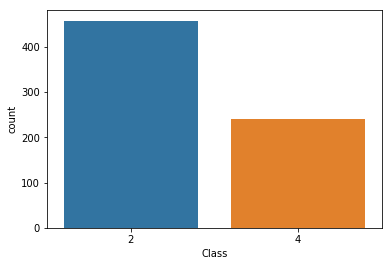

In [341]:
sns.countplot(bc['Class'])

### convert the datatype of Bare Nuclei to `int`

In [ ]:
bc['Bare Nuclei'] = bc['Bare Nuclei'].astype('int64') 

### Standardization of Data (Use Standard Scaler)

In [342]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(bc))
print(scaler.mean_)


StandardScaler(copy=True, with_mean=True, with_std=True)
[1.07170410e+06 4.41773963e+00 3.13447783e+00 3.20743920e+00
 2.80686695e+00 3.21602289e+00 3.48640916e+00 3.43776824e+00
 2.86695279e+00 1.58941345e+00 2.68955651e+00]


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A7C47A438>,
      dtype=object)

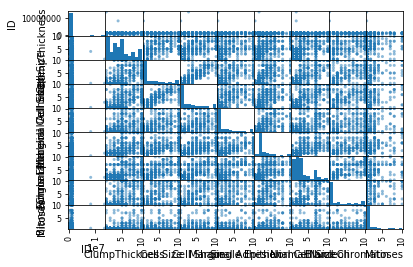

In [344]:
pd.scatter_matrix(bc)

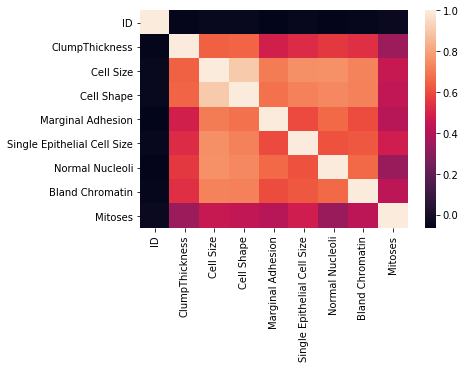

In [351]:
sns.heatmap(data=bc.corr())

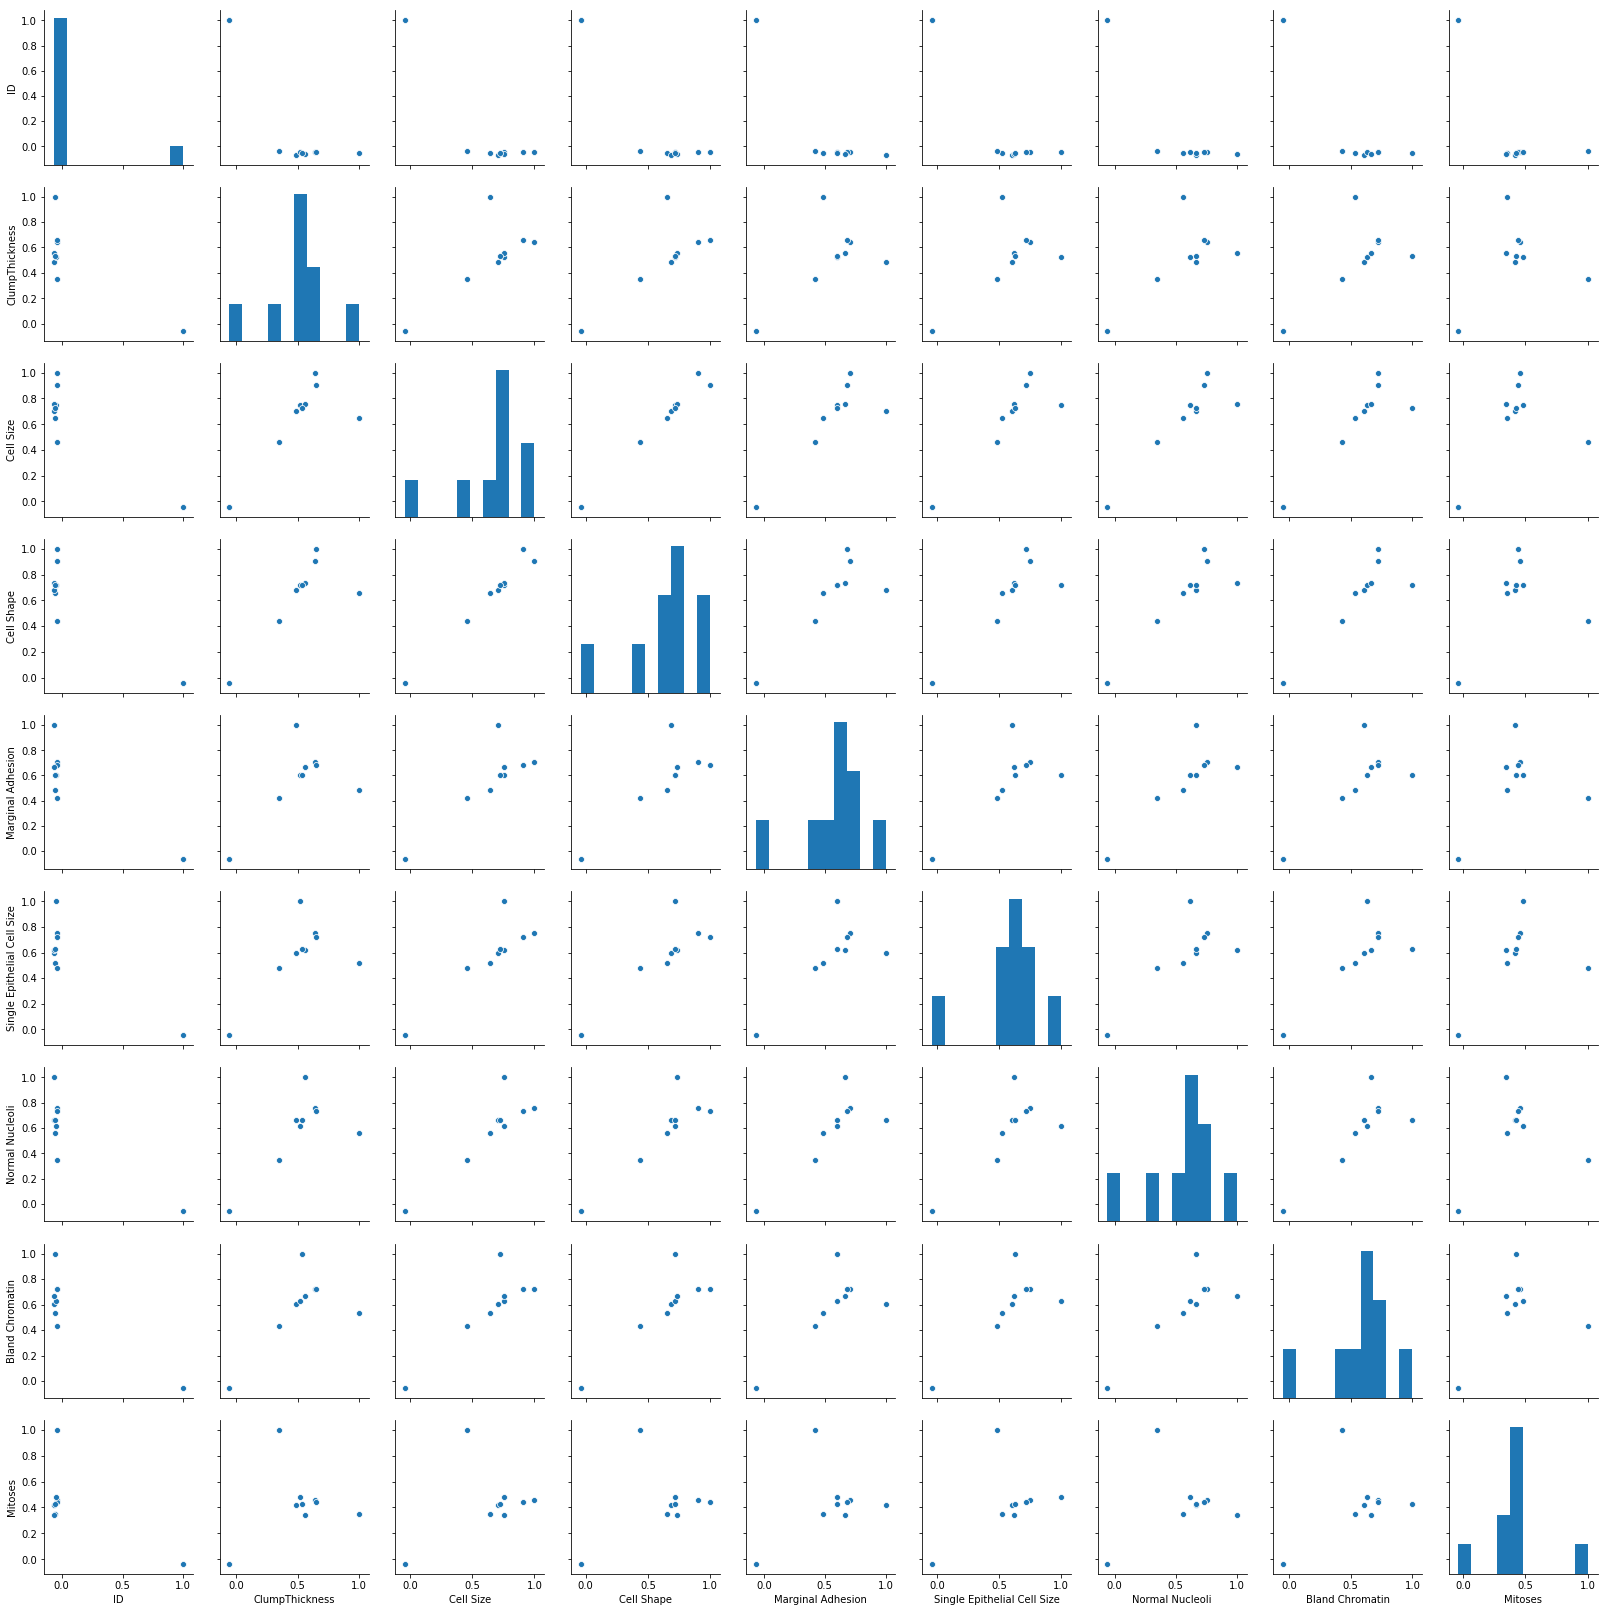

In [352]:
sns.pairplot(data=bc.corr())

### Divide the dataset into feature set and target set

In [403]:
bc_target = bc[['Class']]
bc_target['Class']= bc_target['Class'].astype('category')

# bc_target = np.where(bc_target =2 , 1 ,0)
print(bc_target['Class'].dtype)
# print(bc_target.unique())
bc_feature = bc.drop(columns='Class',axis = 1)
bc_feature['Bare Nuclei']= bc_feature.astype(dtype='int64')
# #bc_feature.dtypes
# print(bc_feature.)

category


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Divide the Training and Test sets in 70:30 

In [404]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(bc_feature,bc_target, test_size = 0.30,random_state = 100)

print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(489, 10) (210, 10) (210, 1) (489, 1)


### Model 1 : Implement a default Decision Tree model with no attributes

In [424]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()


In [425]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [426]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                                  Imp
ID                           0.000000
ClumpThickness               0.007653
Cell Size                    0.027835
Cell Shape                   0.754239
Marginal Adhesion            0.004954
Single Epithelial Cell Size  0.022709
Bare Nuclei                  0.040060
Normal Nucleoli              0.033179
Bland Chromatin              0.081869
Mitoses                      0.027502


### Check the training & test accuracy of model 1 

In [427]:
dt_model.score(X_train,y_train)

1.0

### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [428]:
dt_model2 = DecisionTreeClassifier(max_depth = 10,max_leaf_nodes = 5)
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [429]:
dt_model2.score(X_train,y_train)

0.9652351738241309

### Print the confusion matrix of model 1 and model 2

In [432]:
from sklearn import metrics
y_predict1 = dt_model.predict(X_test)
y_predict2 = dt_model2.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict1))

print(metrics.confusion_matrix(y_test, y_predict2))

[[120   9]
 [ 11  70]]
[[116  13]
 [  9  72]]
